<a href="https://colab.research.google.com/github/mihirkumar28/LP-3/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem**:
A   dataset   collected   in   a   cosmetics   shop   showing   details   of customers and whether or not they responded to a special offer to buy a new lip-stick is shown in table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying   lip-sticks   in   the   future.   Find   the   root   node   of   decision tree. According to the decision tree you have made from previous training data set, what is the decision for the test data: 
    
    [Age < 21,Income = Low, Gender = Female, Marital Status = Married]

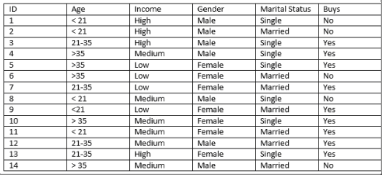

#**Perception**:
    X={x1,x2,x3,x4}
    Y={y}
    x1= Age Group, x1 ∈ {'< 21','21-35','> 35'}
    x2= Income Group, x2 ∈ {'High','Medium','Low'}
    x3= Gender, x3 ∈ {'Male','Female'}
    x4= Marital Status, x4 ∈ {'Single','Married'}
    y= Buys lipstick



*   All values are **categorical** & **discrete** as 

      **|a| ≤ n ∀ a ∈ X where n is a finite positive integer**
      
      **a ≠ b, ∀ (a,b) ∈ X or Y**

      **a ∩ b = Φ**



*   X→Y mapping will be a many to one function.

    **f:X→Y**,
    
    **∀y ∈ Y, ∃ tuple of x ∈ X, f(X)=y**  

#**Cognition**:


*   As mapping function is a many-to one function, Machine Learning is used to map a function f such that **f:X→Y** where f is such that

      **f(X)=∨(x1∧x2∧x3∧x4)=y**

*   As |y|=2 & values in y are categorical & discrete, we will make use of a classifier (supervised learning).







#**Programmer's Perspective**
    
  **System={ st, ed, X, Y, DD, fmain, ff }**

    st={(X,Y)}

    ed={(y_pred)}

    DD={X,Y}
    X={x1,x2,x3,x4}
    x1= Age Group
    x2= Income Group
    x3= Gender
    x4= Marital Status
    
    Y={sucess,failure,error,y}
    y= Buys lipstick

    x1 ∈ {'< 21','21-35','> 35'}
    x2 ∈ {'High','Medium','Low'}
    x3 ∈ {'Male','Female'}
    x4 ∈ {'Single','Married'}
    y ∈ {'Yes','No'}

    fmain=main function which converts start state to end state

    ff=friend functions which assist main function

    
    
    st=Start state=constructor of class

    e=end state=classify_output() function of class

    X=set of input={x1,x2,x3,x4,y}

    Y_output=out of test case given=(success, failure, error, Y_output | Y_output ∈ {Yes,No})

    fmain=where main logic is implemented=predict_main()

    ff=set of friend function={get_dummies(),model(),classify()}

    get_dummies:
    Input:data {x1,x2,x3,x4,y}
    Output:encoded data {x1',x2',x3',x4',y'} where
    
    For each unique value in the original categorical column, a new column is 
    created in this method. These dummy variables are then filled up with zeros 
    and ones (1 meaning TRUE, 0 meaning FALSE)

    Let, the dummy xi be an indicator variable for when the ith person ui is   
    male (a member of set M):

    xi=f(ui)=1 if ui ∈ M
             0 if ui ∉ M

    where f(⋅) is the indicator function for membership of M.

#**Justification For using Decision Trees**
##**Bloom's Taxonomy (Remember)**

Reference: Giuseppe Bonaccorso, “Machine Learning Algorithms”, Packt Publishing Limited, ISBN-10:1785889621, ISBN-13:978-1785889622, Tom Mitchell “Machine Learning” McGraw Hill Publication, ISBN‎‎:‎0070428077 9780070428072




*   Instances are attribute value pairs where each attribute takes on a small number of disjoint values.
*   Target function will have discrete output values.
*   Disjunctive description is required.



#**Gini Impurity**
Reference: 
1. https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3, 
2. https://stats.stackexchange.com/questions/308885/a-simple-clear-explanation-of-the-gini-impurity

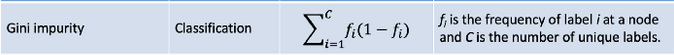

    For node t in the tree, imagine an experiment with k possible output categories. Category j has a probability of occurrence p(j|t) 
    (where j = 1,..k).

    Reproduce the experiment two times and make these observations:

    The probability of obtaining two identical outputs of category j is
                             
                                p(j|t)*p(j|t)

    The probability of obtaining two identical outputs, independently of their category, is:
                              ∑ (p(j|t)*p(j|t))

    the probability of obtaining two different outputs is thus:
                            
                              1 − ∑ (p(j|t)*p(j|t)))

In [ ]:
import pandas as pd
data=pd.read_csv('ML-2.csv')
data.columns[:len(data.columns)-1]

Index(['ID', 'Age', 'Income', 'Gender', 'Marital Status'], dtype='object')

In [ ]:
data

,ID,Age,Income,Gender,Marital Status,Buys
0,1,< 21,High,Male,Single,No
1,2,< 21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,> 35,Medium,Male,Single,Yes
4,5,> 35,Low,Female,Single,Yes
5,6,> 35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,< 21,Medium,Male,Single,No
8,9,< 21,Low,Female,Married,Yes
9,10,> 35,Medium,Female,Single,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              14 non-null     int64 
 1   Age             14 non-null     object
 2   Income          14 non-null     object
 3   Gender          14 non-null     object
 4   Marital Status  14 non-null     object
 5   Buys            14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

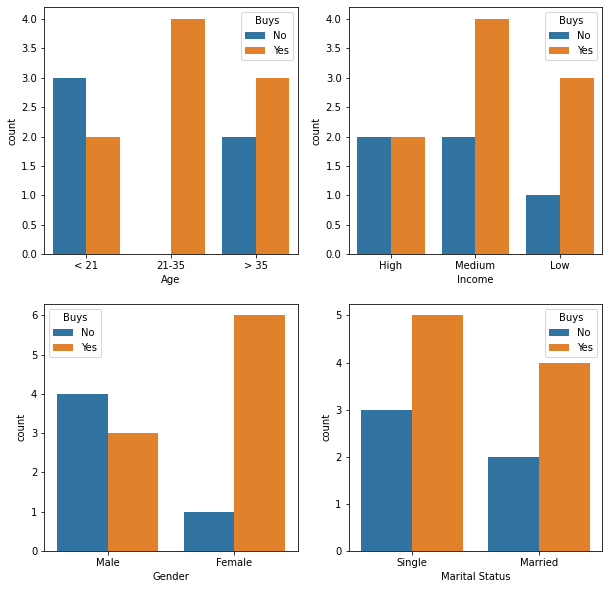

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_,axes=plt.subplots(2,2,figsize=(10,10))
sns.countplot(data.Age,hue=data['Buys'],ax=axes[0,0])
sns.countplot(data.Income,hue=data['Buys'],ax=axes[0,1])
sns.countplot(data.Gender,hue=data['Buys'],ax=axes[1,0])
sns.countplot(data['Marital Status'],hue=data['Buys'],ax=axes[1,1])
plt.show()

#**Bloom's Taxonomy (Apply)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import concurrent.futures

class system:
  def __init__(self):
    self.data=pd.read_csv('ML-2.csv')

  def get_dummies(self,data):   
    return pd.get_dummies(data)

  def model(self,X,y):
    Dtree=DecisionTreeClassifier()
    Dtree.fit(X,y)
    return Dtree

  def testing(self,X_test,y_test,d_tree):
    y_predictions=d_tree.predict(X_test)
    cm=confusion_matrix(y_test.values.argmax(axis=1),y_predictions.argmax(axis=1))
    sns.heatmap(cm,annot=True)
    plt.show()
    

  def classify(self,Dtree):  
    test=pd.DataFrame({'ID':[15],'Age': ['< 21'],'Income':['Low'], 'Gender': ['Female'], 'Marital Status' : ['Married']})
    data1=data[data.columns[:len(data.columns)-1]].append(test)
    test=pd.get_dummies(data1[data1.columns[1:]])
    y_output=Dtree.predict(test.tail(1))
    return y_output
  
  def predict_main(self):
    with concurrent.futures.ThreadPoolExecutor() as executor:
      t1=executor.submit(self.get_dummies,data[data.columns[1:len(data.columns)-1]])
      t2=executor.submit(self.get_dummies,data['Buys'])
      temp_X,temp_y=t1.result(),t2.result()
    self.X,self.y=temp_X,temp_y
    X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.1)
    classification_model=self.model(X_train,y_train)
    self.testing(X_test,y_test,classification_model)
    output=self.classify(classification_model)
    return output,classification_model

#**Bloom's Taxonomy (Evaluate)**

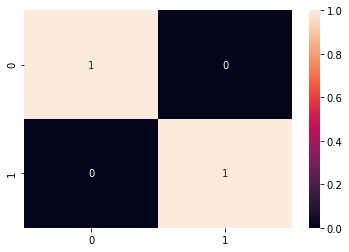

For our test case, output is:
Yes


In [ ]:
classifier=system()
output,model=classifier.predict_main()
print('For our test case, output is:')
if output[0][1]==1:
  print('Yes')
else:
  print('No')

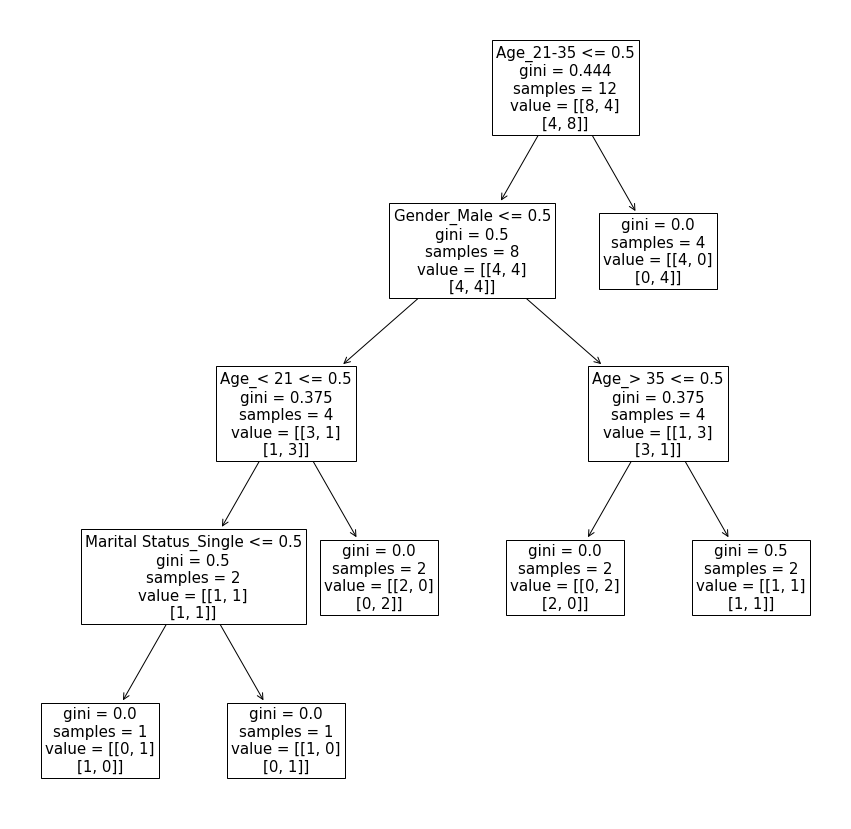

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(model,fontsize=15,feature_names=pd.get_dummies(data[data.columns[1:len(data.columns)-1]]).columns)
plt.show()

#**Bloom's Taxonomy (Create)**

In [ ]:
test=pd.DataFrame({'ID':[15],'Age': ['<21'],'Income':['Low'], 'Gender': ['Female'], 'Marital Status' : ['Married']})
data1=data[data.columns[:len(data.columns)-1]].append(test)
test=pd.get_dummies(data1[data1.columns[1:]])
test.tail(1)

,Age_21-35,Age_< 21,Age_<21,Age_> 35,Income_High,Income_Low,Income_Medium,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Single
0,0,0,1,0,0,1,0,1,0,1,0


In [ ]:
pd.get_dummies(data[data.columns[1:len(data.columns)-1]])

,Age_21-35,Age_< 21,Age_> 35,Income_High,Income_Low,Income_Medium,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Single
0,0,1,0,1,0,0,0,1,0,1
1,0,1,0,1,0,0,0,1,1,0
2,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,1,0,1
4,0,0,1,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0,1,0
6,1,0,0,0,1,0,1,0,1,0
7,0,1,0,0,0,1,0,1,0,1
8,0,1,0,0,1,0,1,0,1,0
9,0,0,1,0,0,1,1,0,0,1


In [ ]:
pd.get_dummies(data['Buys'])

,No,Yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1
